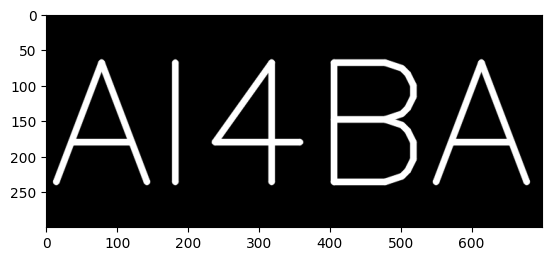

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np


def show_results(images, titles):
    """
    Displays multiple images in a single row with their titles.
    
    Parameters:
    - images: List of images to display
    - titles: List of titles corresponding to each image
    """
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def create_image_with_text(text, font_size):
    # Define image dimensions based on text length and font size
    width = 700  # Adjust the width as needed
    height = 300  # Adjust the height as needed
    
    # Create a black background image
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Define font type and scale
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = font_size
    color = (255, 255, 255)  # White color for the text
    thickness = int(font_size)  # Adjust thickness relative to font size
    
    # Get text size to center it on the image
    text_size = cv2.getTextSize(text, font, scale, thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    text_y = (image.shape[0] + text_size[1]) // 2
    
    # Put text on the image
    cv2.putText(image, text, (text_x, text_y), font, scale, color, thickness, cv2.LINE_AA)
    
    return image

# Example usage
original = create_image_with_text("AI4BA", 8)

# Display the image
plt.imshow(original)

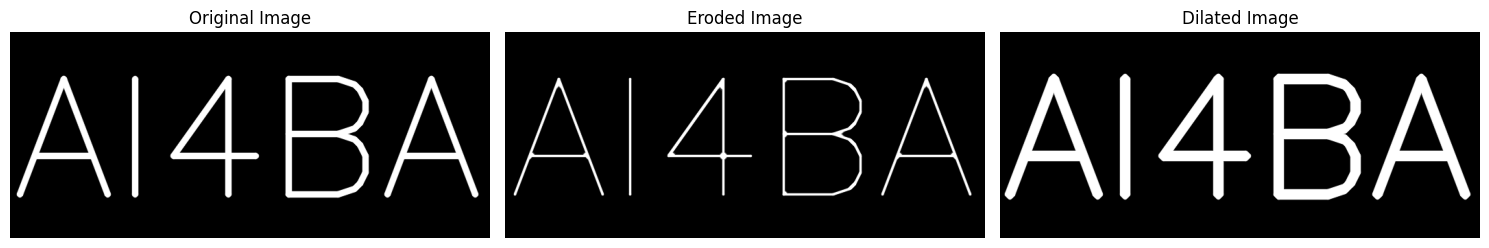

In [4]:

# Define kernels
kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3 , 3))
# 1. Erosion
eroded = cv2.erode(original, kernel_3x3, iterations=3)
dilated = cv2.dilate(original, kernel_3x3, iterations=3)

        
show_results([original, eroded, dilated], ['Original Image', 'Eroded Image', 'Dilated Image'])

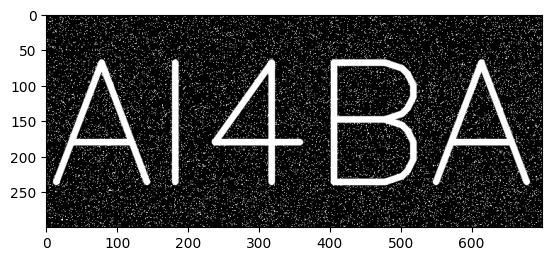

In [5]:
import cv2
import numpy as np
import random

def create_noisy_image_with_text(text, font_size, n_noise_points):
    # Define image dimensions based on text length and font size
    width = 700  # Adjust the width as needed
    height = 300  # Adjust the height as needed
    
    # Create a black background image
    image = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Define font type and scale
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = font_size
    color = (255, 255, 255)  # White color for the text
    thickness = int(font_size)  # Adjust thickness relative to font size
    
    # Get text size to center it on the image
    text_size = cv2.getTextSize(text, font, scale, thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    text_y = (image.shape[0] + text_size[1]) // 2
    
    # Put text on the image
    cv2.putText(image, text, (text_x, text_y), font, scale, color, thickness, cv2.LINE_AA)
    
    # Add random noise points
    for _ in range(n_noise_points):
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)
        image[y, x] = (255, 255, 255)  # Add white noise points
    
    return image

# Example usage
result_image = create_noisy_image_with_text("AI4BA", 8, 15000)

# Save the image
cv2.imwrite("noisy_text_image.jpg", result_image)


# Display the image
plt.imshow(result_image)


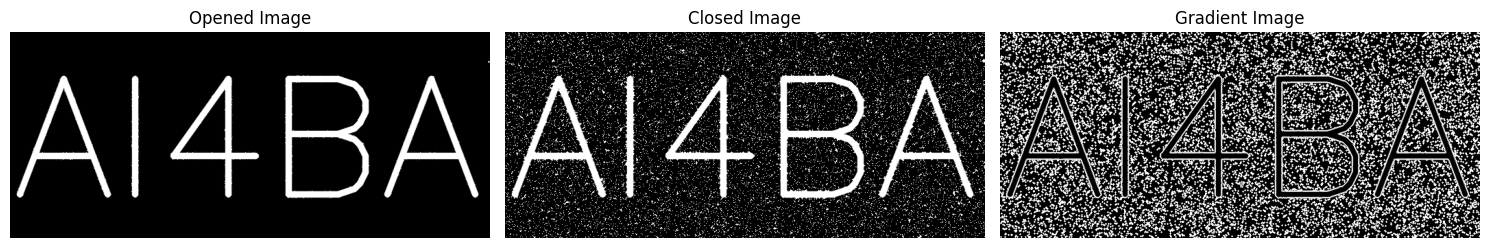

In [8]:


# 3. Opening (Erosion followed by Dilation)
opened = cv2.morphologyEx(result_image, cv2.MORPH_OPEN, kernel_3x3)

# 4. Closing (Dilation followed by Erosion)
closed = cv2.morphologyEx(result_image, cv2.MORPH_CLOSE, kernel_3x3)

# 5. Gradient (Difference between Dilation and Erosion)
gradient = cv2.morphologyEx(result_image, cv2.MORPH_GRADIENT, kernel_3x3)


show_results([opened, closed, gradient], ['Opened Image', 'Closed Image', 'Gradient Image'])